In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.rcParams['figure.figsize'] = (19, 5)
plt.rcParams['font.size'] = 14

In [3]:
# Load data

raw_df = pd.read_csv('train.csv')

In [4]:
raw_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
raw_df.info()
raw_df.describe()
raw_df.isnull().sum()
raw_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

# EDA

In [14]:
raw_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Mitch Gastineau       16.739
Carl Jackson          16.520
Sung Chung            14.112
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

In [16]:
# Extract date and sales
data = raw_df[['Order Date', 'Sales']].copy()
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

Text(0, 0.5, 'Sales')

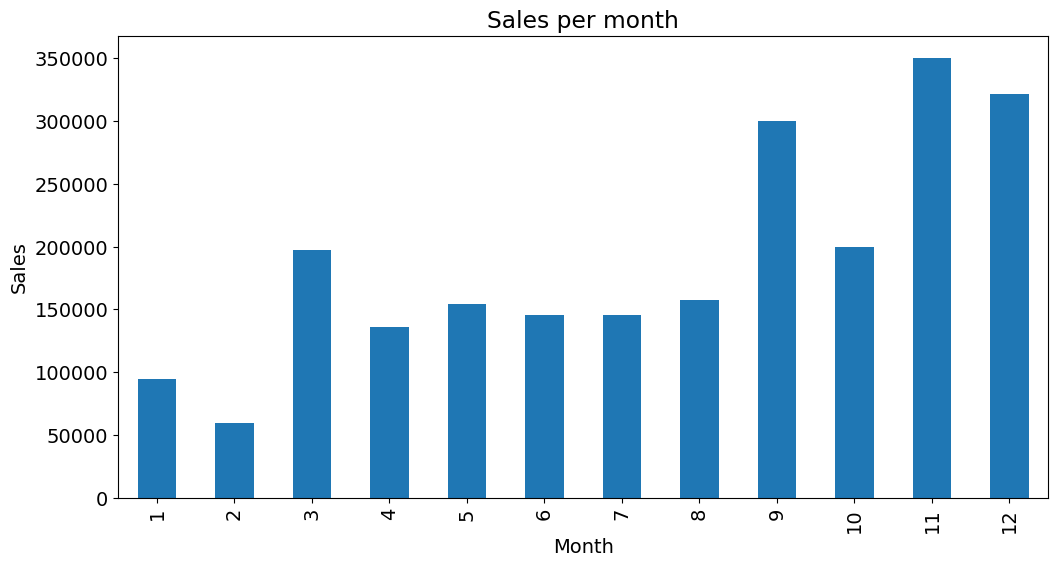

In [70]:
# Sales per month (cummulatively over the years)
plt.figure(figsize=(12, 6))
data.groupby(data['Order Date'].dt.month)['Sales'].sum().plot(kind='bar')
plt.title('Sales per month')
plt.xlabel('Month')
plt.ylabel('Sales')

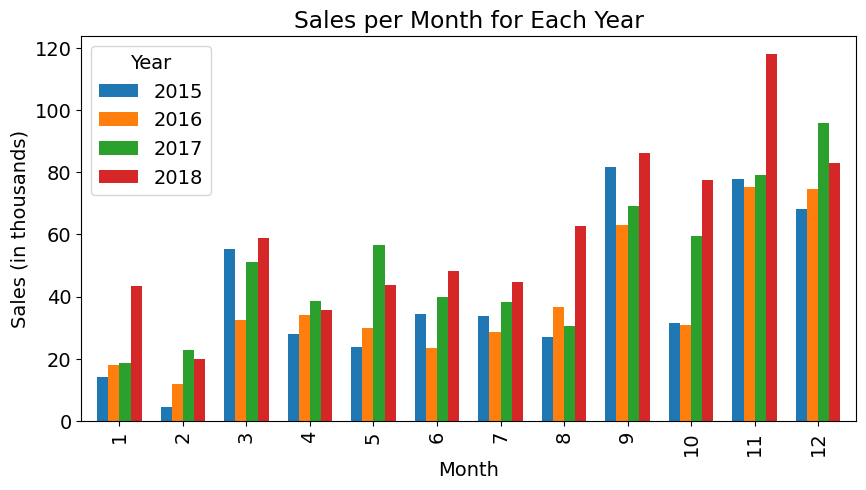

In [72]:
# Extract year and month 
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Group by year and month, and calculate the sum of sales
sales_per_month = data.groupby(['Year', 'Month'])['Sales'].sum()/1000

# Reshape the data to have years as columns and months as rows
sales_per_month = sales_per_month.unstack(level=0)

# Create the bar plot
sales_per_month.plot(kind='bar', figsize=(10, 5), width=0.7)


plt.title('Sales per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Sales (in thousands)')
plt.legend(title='Year')

Text(0, 0.5, 'Sales (in thousands)')

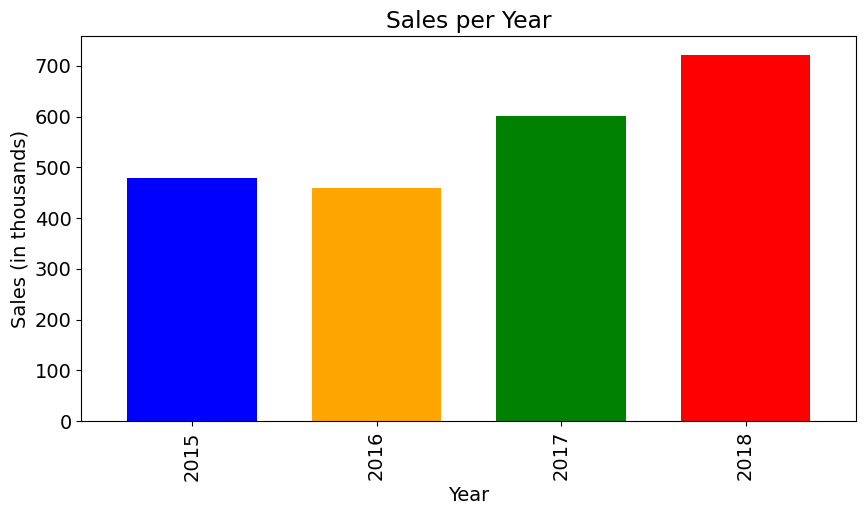

In [81]:
sales_per_year = data.groupby('Year')['Sales'].sum()/1000 
colors = ['Blue', 'Orange', 'Green', 'Red']
sales_per_year.plot(kind='bar', figsize=(10, 5), width=0.7, color=colors)

plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales (in thousands)')